In [1]:
import numpy as np
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from numpy import expand_dims
from keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Conv2D, BatchNormalization
from tensorflow.keras.optimizers import Nadam, Adam, SGD, Adadelta, Adamax

%matplotlib inline

In [2]:
path = '../input/brain-mri-images-for-brain-tumor-detection/'

In [3]:
list_dir = os.listdir(path)

In [4]:
print(list_dir)

['brain_tumor_dataset', 'yes', 'no']


In [5]:
yes = cv2.imread('../input/brain-mri-images-for-brain-tumor-detection/yes/Y1.jpg')
no = cv2.imread('../input/brain-mri-images-for-brain-tumor-detection/no/19 no.jpg')

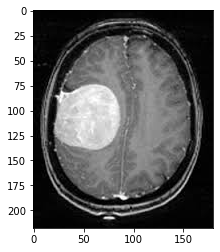

In [6]:
plt.imshow(yes)

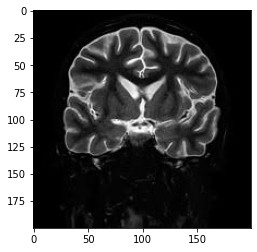

In [7]:
plt.imshow(no)

# Making dataframes

In [8]:
    name_path = []
    shape1=[]
    shape2=[]
    shape3=[]

    for i in os.listdir(path+'yes/'):
        item = cv2.imread(path + 'yes/' + i)
        item.shape
        name_path.append(path + 'yes/' + i)
        shape1.append(item.shape[0])
        shape2.append(item.shape[1])
        shape3.append(item.shape[2])

In [9]:
train_df = pd.DataFrame(columns=['name', 'width', 'height', 'ch', 'class'])
train_df['name'], train_df['width'], train_df['height'], train_df['ch'], train_df['class'] = name_path, shape1, shape2, shape3, 'yes'
train_df.tail()

,name,width,height,ch,class
150,../input/brain-mri-images-for-brain-tumor-dete...,355,290,3,yes
151,../input/brain-mri-images-for-brain-tumor-dete...,1200,1059,3,yes
152,../input/brain-mri-images-for-brain-tumor-dete...,325,300,3,yes
153,../input/brain-mri-images-for-brain-tumor-dete...,340,314,3,yes
154,../input/brain-mri-images-for-brain-tumor-dete...,630,630,3,yes


In [10]:
name_path = []
shape1=[]
shape2=[]
shape3=[]

for i in os.listdir(path+'no/'):
    item = cv2.imread(path + 'no/' + i)
    item.shape
    name_path.append(path + 'no/' + i)
    shape1.append(item.shape[0])
    shape2.append(item.shape[1])
    shape3.append(item.shape[2])

In [11]:
no_df = pd.DataFrame(columns=['name', 'width', 'height', 'ch', 'class'])
no_df['name'], no_df['width'], no_df['height'], no_df['ch'], no_df['class'] = name_path, shape1, shape2, shape3, 'no'
no_df.head()

,name,width,height,ch,class
0,../input/brain-mri-images-for-brain-tumor-dete...,250,201,3,no
1,../input/brain-mri-images-for-brain-tumor-dete...,251,201,3,no
2,../input/brain-mri-images-for-brain-tumor-dete...,221,228,3,no
3,../input/brain-mri-images-for-brain-tumor-dete...,244,206,3,no
4,../input/brain-mri-images-for-brain-tumor-dete...,442,442,3,no


In [12]:
no_df.width.unique()

array([ 250,  251,  221,  244,  442,  393,  282,  213,  664,  338,  361,
        238,  201,  225,  512,  259, 1024,  750,  234,  262,  630,  474,
        301,  537,  192,  231,  236,  444,  197,  540,  400,  252,  183,
        257,  275,  530,  340,  214,  168,  614,  449,  217,  725,  194,
       1080,  198,  680,  264,  280,  242,  200,  454,  222,  243,  248,
        326,  417])

In [13]:
no_df.height.unique()

array([ 201,  228,  206,  442,  350,  230,  236,  550,  276,  642,  400,
        212,  173,  225,  512,  194, 1024,  750,  215,  227,  630,  356,
        275,  472,  192,  218,  214,  468,  177,  504,  393,  200,  196,
        220,  380,  339,  235,  300,  359,  232,  728,  259, 1920,  150,
        441,  680,  210,  409,  420,  208,  207,  428])

In [14]:
no_df.ch.unique()

array([3])

In [15]:
print(no_df.width.min(), no_df.height.min())

168 150


# Make test set

In [16]:
test_df = train_df.iloc[-10:-1, :]

In [17]:
test_df

,name,width,height,ch,class
145,../input/brain-mri-images-for-brain-tumor-dete...,225,225,3,yes
146,../input/brain-mri-images-for-brain-tumor-dete...,300,289,3,yes
147,../input/brain-mri-images-for-brain-tumor-dete...,938,864,3,yes
148,../input/brain-mri-images-for-brain-tumor-dete...,620,620,3,yes
149,../input/brain-mri-images-for-brain-tumor-dete...,334,283,3,yes
150,../input/brain-mri-images-for-brain-tumor-dete...,355,290,3,yes
151,../input/brain-mri-images-for-brain-tumor-dete...,1200,1059,3,yes
152,../input/brain-mri-images-for-brain-tumor-dete...,325,300,3,yes
153,../input/brain-mri-images-for-brain-tumor-dete...,340,314,3,yes


In [18]:
train_df.drop(train_df.index[145:154], inplace=True)

In [19]:
len(train_df.index)

146

In [20]:
test_df_no = no_df.iloc[-10:-1, :]

In [21]:
test_df_no

,name,width,height,ch,class
88,../input/brain-mri-images-for-brain-tumor-dete...,442,442,3,no
89,../input/brain-mri-images-for-brain-tumor-dete...,630,630,3,no
90,../input/brain-mri-images-for-brain-tumor-dete...,243,207,3,no
91,../input/brain-mri-images-for-brain-tumor-dete...,248,208,3,no
92,../input/brain-mri-images-for-brain-tumor-dete...,326,276,3,no
93,../input/brain-mri-images-for-brain-tumor-dete...,225,225,3,no
94,../input/brain-mri-images-for-brain-tumor-dete...,630,630,3,no
95,../input/brain-mri-images-for-brain-tumor-dete...,242,208,3,no
96,../input/brain-mri-images-for-brain-tumor-dete...,417,428,3,no


In [22]:
no_df.drop(no_df.index[88:97], inplace=True)

In [23]:
len(no_df.index)

89

In [24]:
test = test_df.append(test_df_no, ignore_index = True) 

In [25]:
len(test.index)

18

# Make train set

In [26]:
train = train_df.append(no_df, ignore_index = True) 

In [27]:
len(train.index)

235

# The Dataframes

In [28]:
train.head()

,name,width,height,ch,class
0,../input/brain-mri-images-for-brain-tumor-dete...,323,276,3,yes
1,../input/brain-mri-images-for-brain-tumor-dete...,355,310,3,yes
2,../input/brain-mri-images-for-brain-tumor-dete...,349,278,3,yes
3,../input/brain-mri-images-for-brain-tumor-dete...,331,272,3,yes
4,../input/brain-mri-images-for-brain-tumor-dete...,344,279,3,yes


In [29]:
test.head()

,name,width,height,ch,class
0,../input/brain-mri-images-for-brain-tumor-dete...,225,225,3,yes
1,../input/brain-mri-images-for-brain-tumor-dete...,300,289,3,yes
2,../input/brain-mri-images-for-brain-tumor-dete...,938,864,3,yes
3,../input/brain-mri-images-for-brain-tumor-dete...,620,620,3,yes
4,../input/brain-mri-images-for-brain-tumor-dete...,334,283,3,yes


# Data generators

In [30]:
shape = 112
batch_size = 32
learn_r = 0.001

In [31]:
train_datagen = ImageDataGenerator(rescale=1.0/255, rotation_range=30, width_shift_range=0.2, 
                                   height_shift_range=0.2, zoom_range=0.1, vertical_flip=True, horizontal_flip=True, validation_split=0.2)

In [32]:
train_generator = train_datagen.flow_from_dataframe(train, target_size=(shape, shape),batch_size=batch_size,class_mode='binary',subset='training', 
                                                   x_col='name',y_col="class", color_mode="rgb", shuffle=True)

validation_generator = train_datagen.flow_from_dataframe(train, target_size=(shape, shape),batch_size=batch_size,class_mode='binary',subset='validation', 
                                                   x_col='name',y_col="class", color_mode="rgb", shuffle=True)

Found 188 validated image filenames belonging to 2 classes.
Found 47 validated image filenames belonging to 2 classes.


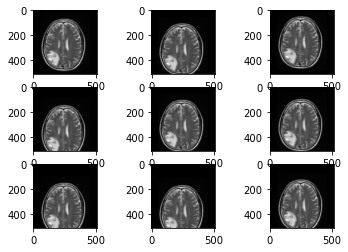

In [33]:
img = load_img('../input/brain-mri-images-for-brain-tumor-detection/yes/Y107.jpg')

data = img_to_array(img)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(height_shift_range=0.2)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	pyplot.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	pyplot.imshow(image)
pyplot.show()

# Create the Model

In [34]:
from tensorflow.keras.applications import VGG16, VGG19, EfficientNetB7, Xception, InceptionV3
opt_1 = SGD(learning_rate=learn_r, momentum=0.9)
opt_2 = Adam(learning_rate= learn_r)
opt_3 = Nadam(learning_rate= learn_r)
opt_4 = Adamax(learning_rate= learn_r, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

In [35]:
apps = [VGG16, VGG19, EfficientNetB7, Xception, InceptionV3]

In [36]:
def get_model():    
    base_model =  apps[4](input_shape=(shape,shape,3), weights='imagenet', include_top=False, pooling='avg')
    x = base_model.output
    x = Dropout(0.1)(x)
    predictions = Dense(1, activation="sigmoid")(x)
    return Model(inputs=base_model.input, outputs=predictions)

In [37]:
model = get_model()
    
model.compile(optimizer=opt_1, loss='binary_crossentropy', metrics= 'accuracy')

87916544/87910968 [==============================] - 1s 0us/step


In [38]:
history = model.fit_generator(train_generator, epochs=30, validation_data=validation_generator)

Epoch 1/30
6/6 [==============================] - 4s 628ms/step - loss: 0.7319 - accuracy: 0.5319 - val_loss: 0.2350 - val_accuracy: 0.9362
Epoch 2/30
6/6 [==============================] - 3s 419ms/step - loss: 0.6721 - accuracy: 0.5585 - val_loss: 0.0420 - val_accuracy: 1.0000
Epoch 3/30
6/6 [==============================] - 2s 250ms/step - loss: 0.6542 - accuracy: 0.6330 - val_loss: 0.0695 - val_accuracy: 1.0000
Epoch 4/30
6/6 [==============================] - 2s 377ms/step - loss: 0.5659 - accuracy: 0.7500 - val_loss: 0.1586 - val_accuracy: 1.0000
Epoch 5/30
6/6 [==============================] - 2s 253ms/step - loss: 0.4917 - accuracy: 0.7926 - val_loss: 0.2094 - val_accuracy: 0.9362
Epoch 6/30
6/6 [==============================] - 1s 246ms/step - loss: 0.4137 - accuracy: 0.8617 - val_loss: 0.1533 - val_accuracy: 0.9787
Epoch 7/30
6/6 [==============================] - 1s 247ms/step - loss: 0.4346 - accuracy: 0.7926 - val_loss: 0.1427 - val_accuracy: 0.9574
Epoch 8/30
6/6 [====

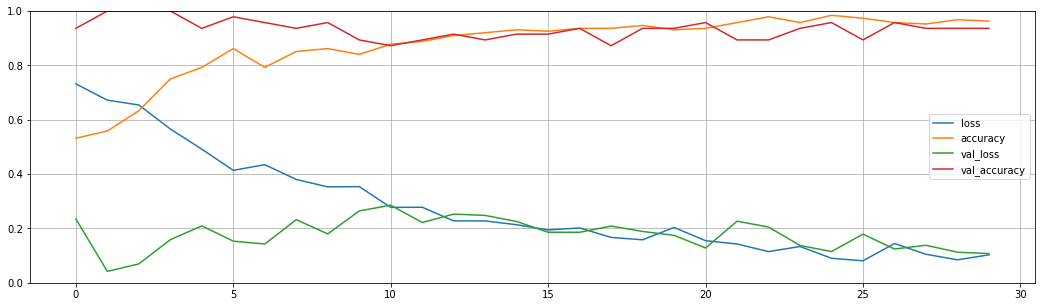

In [39]:
pd.DataFrame(history.history).plot(figsize=(18, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Testing

In [40]:
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_dataframe(test, x_col='name', y_col='class', batch_size= 1, shuffle=False, target_size=(shape,shape))

Found 18 validated image filenames belonging to 2 classes.


In [41]:
test_generator.reset()
pred=model.predict_generator(test_generator,verbose=1)

18/18 [==============================] - 0s 14ms/step


In [42]:
test_generator.class_indices

{'no': 0, 'yes': 1}

In [43]:
test_generator.filenames

['../input/brain-mri-images-for-brain-tumor-detection/yes/Y4.jpg',
 '../input/brain-mri-images-for-brain-tumor-detection/yes/Y14.jpg',
 '../input/brain-mri-images-for-brain-tumor-detection/yes/Y96.jpg',
 '../input/brain-mri-images-for-brain-tumor-detection/yes/Y74.jpg',
 '../input/brain-mri-images-for-brain-tumor-detection/yes/Y158.JPG',
 '../input/brain-mri-images-for-brain-tumor-detection/yes/Y170.JPG',
 '../input/brain-mri-images-for-brain-tumor-detection/yes/Y108.jpg',
 '../input/brain-mri-images-for-brain-tumor-detection/yes/Y30.jpg',
 '../input/brain-mri-images-for-brain-tumor-detection/yes/Y58.JPG',
 '../input/brain-mri-images-for-brain-tumor-detection/no/no 5.jpeg',
 '../input/brain-mri-images-for-brain-tumor-detection/no/2 no.jpeg',
 '../input/brain-mri-images-for-brain-tumor-detection/no/22 no.jpg',
 '../input/brain-mri-images-for-brain-tumor-detection/no/N2.JPG',
 '../input/brain-mri-images-for-brain-tumor-detection/no/N22.JPG',
 '../input/brain-mri-images-for-brain-tumor-de

In [44]:
predict = []
for i in pred:
    if i < 0.5:
        print('no')
        predict.append('no')
    else:
        print('yes')
        predict.append('yes')
    

yes
yes
yes
yes
yes
yes
yes
yes
yes
no
no
no
no
yes
no
no
no
no


In [45]:
results = pd.DataFrame(columns=['Filename', 'Predictions'])

In [46]:
results.head()

,Filename,Predictions


In [47]:
results['Filename']= test_generator.filenames

In [48]:
results['Predictions']=predict

yes


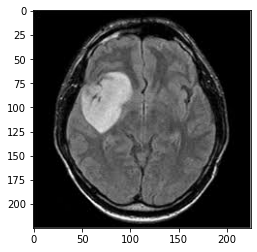

yes


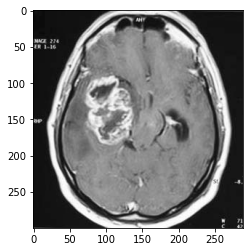

yes


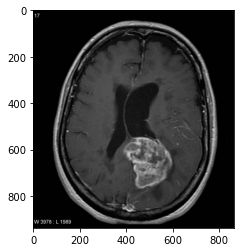

yes


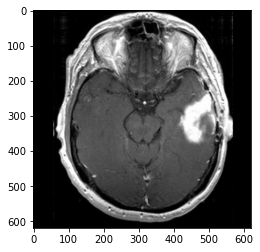

yes


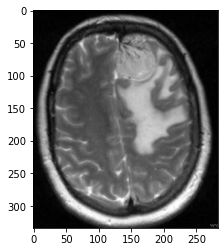

yes


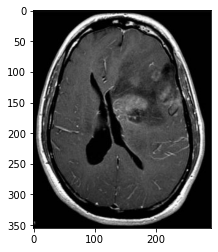

yes


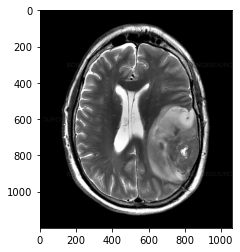

yes


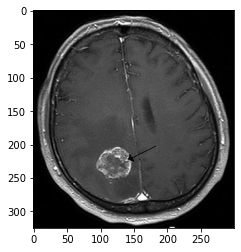

yes


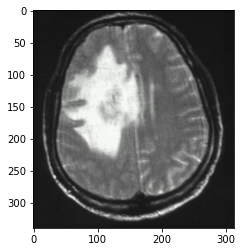

no


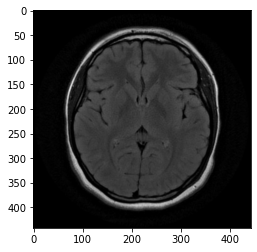

no


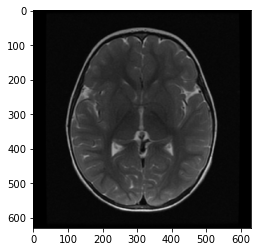

no


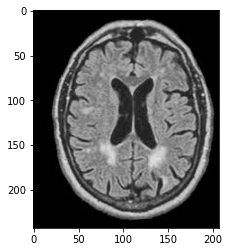

no


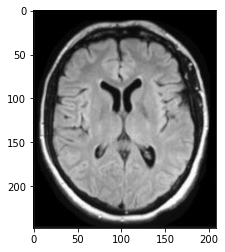

yes


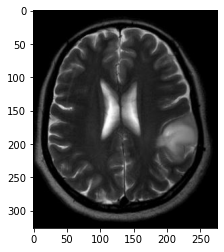

no


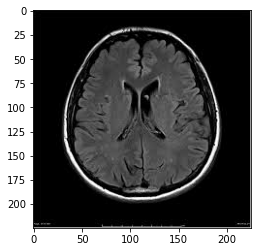

no


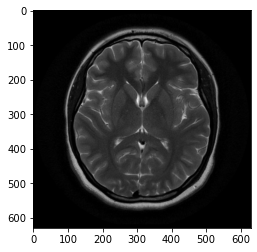

no


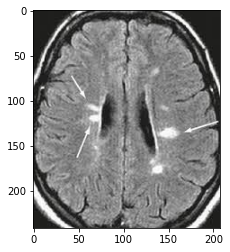

no


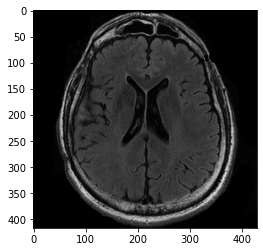

In [49]:
for pic, name in zip(results['Filename'], results['Predictions']): 
    img = load_img(pic)
    plt.imshow(img)
    print(name)   
    plt.show()